<h1 style="font-size:60px;">Rossmann Store Sales Prediction</h1>

<main>
    <h2>Informations From Kaggle</h2>
    <ul><b>Description</b><br>
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! </ul>
    <ul><b>Evaluation</b><br>Submissions are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as follows,
where y_i denotes the sales of a single store on a single day and yhat_i denotes the corresponding prediction. Any day and store with 0 sales is ignored in scoring.

</ul>
</main>

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
ss=pd.read_csv("/kaggle/input/rossmann-store-sales/sample_submission.csv")
store=pd.read_csv("/kaggle/input/rossmann-store-sales/store.csv")
test=pd.read_csv("/kaggle/input/rossmann-store-sales/test.csv")
train=pd.read_csv("/kaggle/input/rossmann-store-sales/train.csv")

## EDA-Exploratory Data Analysis

**What is EDA?**<br>
EDA(Exploratory Data Analysis) is a method of data analysis that involves an initial. It helps me to understand the data better.

In [2]:
ss.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


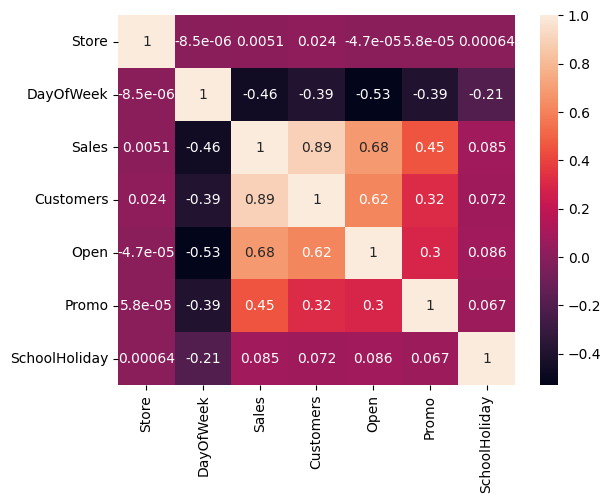

In [6]:
sns.heatmap(train.corr(numeric_only=True),annot=True)
plt.show()

In [7]:
abs(train.corr(numeric_only=True)["Sales"]).sort_values(ascending=False)

Sales            1.000000
Customers        0.894711
Open             0.678472
DayOfWeek        0.462125
Promo            0.452345
SchoolHoliday    0.085124
Store            0.005126
Name: Sales, dtype: float64

## Feature Engineering

As seen above there is a high correlation between Sales and Customers. But in my test dataset there is no Customers column. That's why I can't use it to train my model, if I can't obtain the column from my store dataeset.

In [8]:
df=pd.merge(train,store,how="left",on="Store")

In [9]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
test["Customers"]=df["Customers"]

In [12]:
train=train[["Sales","Customers","Open","DayOfWeek","Promo"]]
test=test[["Customers","Open","DayOfWeek","Promo"]]

In [13]:
train.head()

,Sales,Customers,Open,DayOfWeek,Promo
0,5263,555,1,5,1
1,6064,625,1,5,1
2,8314,821,1,5,1
3,13995,1498,1,5,1
4,4822,559,1,5,1


In [14]:
test.head()

,Customers,Open,DayOfWeek,Promo
0,555,1.0,4,1
1,625,1.0,4,1
2,821,1.0,4,1
3,1498,1.0,4,1
4,559,1.0,4,1


In [15]:
print(test.isnull().sum())
print(train.isnull().sum())

Customers     0
Open         11
DayOfWeek     0
Promo         0
dtype: int64
Sales        0
Customers    0
Open         0
DayOfWeek    0
Promo        0
dtype: int64


In [16]:
test.isnull().sum()

Customers     0
Open         11
DayOfWeek     0
Promo         0
dtype: int64

In [17]:
test.fillna(0,inplace=True)

In [18]:
test.isnull().sum()

Customers    0
Open         0
DayOfWeek    0
Promo        0
dtype: int64

## Modelling

In [19]:
x=train.drop("Sales",axis=1)
y=train["Sales"]

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
train.shape

(1017209, 5)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-06-04 18:00:37.134071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 18:00:37.134222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 18:00:37.305599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 4, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,235 (504.82 KB)

 Trainable params: 129,235 (504.82 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train, y_train, batch_size=1, epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
813767/813767 ━━━━━━━━━━━━━━━━━━━━ 5214s 6ms/step - loss: 9426815.0000 - val_loss: 6638360.5000
Epoch 2/2
813767/813767 ━━━━━━━━━━━━━━━━━━━━ 5259s 6ms/step - loss: 6667032.5000 - val_loss: 6647095.5000


In [25]:
from sklearn.metrics import mean_squared_error
prediction=model.predict(x_test)
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
print(rmse)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
2578.264080362072


In [26]:
model.save("rossmann.h5")

In this project I triied to predict the sales of Rosmann stores. I used a LSTM model because LSTMs mitigate the vanishing gradient problem, making them better at learning long-term dependencies compared to traditional RNNs. If you want to learn more about LSTMs you can look <a href="https://thecleverprogrammer.com/2020/08/29/time-series-with-lstm-in-machine-learning/">here</a>. 